# INTRODUCITON

## Customer and Marketing Insights Analysis using google Analytics Ecommerce data 
### Google Analytics Sample Dataset

**Author:** Patience Anono  
**Role:** Data Consultant  
**Tools Used:** BigQuery (SQL), Python (Pandas, Matplotlib, Seaborn) 

---

## 📌 Project Overview

Modern businesses generate vast amounts of digital data, yet many struggle to
translate this data into insights that drive measurable growth.

This project leverages **Google Analytics session-level data** to analyze how
users interact with an e-commerce website, how marketing channels perform and
which products and customers contribute the most value.

The analysis mirrors a **real-world consulting engagement**, where stakeholders
need clear, actionable insights — not just charts or metrics.


## 🧠 Business Context

The business operates an e-commerce platform and wants to understand:

- How effective its **marketing channels and campaigns** are
- How users behave once they land on the website
- Which **products** drive revenue
- Where potential **conversion drop-offs** occur in the customer journey

The leadership team is particularly interested in improving:
- Marketing ROI
- Customer engagement
- Conversion rates
- Revenue performance

## 🎯 Objectives of This Analysis

The primary objectives of this project are to:

1. Evaluate **marketing performance** across channels and campaigns
2. Analyze **customer behavior and engagement**
3. Identify **top-performing products**
4. Examine the **conversion funnel** from product views to purchases
5. Translate findings into **clear business recommendations**


## 📊 Dataset Description

The dataset used in this analysis is the public:

**`bigquery-public-data.google_analytics_sample`**

Specifically, this project uses:
- `ga_sessions_2017*` tables

The data includes anonymized session-level information such as:
- Traffic sources
- User sessions
- Pageviews and engagement metrics
- E-commerce transactions and revenue
- Product-level interactions

## 🏗️ Analytical Approach

To ensure clarity, scalability and reproducibility, the analysis follows a
structured approach:

1. **Data Extraction & Aggregation** using SQL in BigQuery  
2. **Export of curated analytical tables** into CSV format  
3. **Exploratory Data Analysis (EDA)** in Python  
4. **Visualization of key trends and patterns**  
5. **Insight generation and business recommendations**

Each section of this notebook builds logically on the previous one, allowing
both technical and non-technical readers to follow the narrative seamlessly.

## 📘 How to Read This Notebook

- **Markdown sections** explain the business logic and insights
- **Code cells** show how results were derived
- **Visualizations** support decision-making, not just exploration
- **Insight summaries** translate numbers into actions

This notebook is designed to be:
- Recruiter-friendly
- Stakeholder-ready
- Production-minded


> **Outcome:**  
> By the end of this notebook, stakeholders will have a clear understanding of
> what is working, what is not, and where to focus efforts to drive growth.

# DATA SOURCES

## 2. Data Sources

This analysis is based on curated analytical tables derived from the public
Google Analytics sample dataset available in BigQuery.

Rather than working directly with raw, nested session data, the data was
**pre-aggregated using SQL** to create purpose-specific tables.  
This approach reflects real-world analytics workflows where SQL is used to
prepare clean, analysis-ready datasets.

### Source Dataset
- **BigQuery Public Dataset:** `bigquery-public-data.google_analytics_sample`
- **Tables Used:** `ga_sessions_2017*`

### Analytical Tables Used

The following CSV files are used in this notebook:

1. **`marketing_performance.csv`**  
   - Marketing channel and campaign performance over time  
   - Metrics include users, sessions, transactions, and revenue  

2. **`customer_behavior.csv`**  
   - Customer-level engagement and value metrics  
   - Includes sessions, transactions, revenue, and engagement indicators  

3. **`product_performance.csv`**  
   - Product-level sales performance  
   - Includes units sold and revenue per product  

4. **`funnel_metrics.csv`**  
   - High-level conversion funnel metrics  
   - Tracks sessions → product views → purchases  

Each table serves a distinct analytical purpose, allowing for focused insights
without unnecessary data complexity.

# LOAD LIBRARIES 

In [1]:
# Core data analysis libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Global visualization style
sns.set_style("whitegrid")

# Display settings
pd.set_option("display.max_columns", None)


# LOAD CSV FILES 

In [2]:
# Load analytical datasets
marketing_df = pd.read_csv("marketing_performance.csv", parse_dates=["session_date"])
customer_df = pd.read_csv("customer_behavior.csv")
product_df = pd.read_csv("product_performance.csv")
funnel_df = pd.read_csv("funnel_metrics.csv")

# Preview the datasets
marketing_df.head(), customer_df.head(), product_df.head(), funnel_df


(  session_date                    source    medium  \
 0   2017-01-01                     baidu   organic   
 1   2017-01-01               youtube.com  referral   
 2   2017-01-01                    google       cpc   
 3   2017-01-01  productforums.google.com  referral   
 4   2017-01-01                    google       cpc   
 
                              campaign  users  sessions  transactions  revenue  
 0                           (not set)      6         7             0      0.0  
 1                           (not set)    260       269             0      0.0  
 2                           (not set)     26        32             0      0.0  
 3                           (not set)      2         2             0      0.0  
 4  AW - Dynamic Search Ads Whole Site     45        47             0      0.0  ,
            customer_id  total_sessions  total_transactions  total_revenue  \
 0  1809652848621523112               1                   0            0.0   
 1   329588059348789342  

### Data Loading Validation

The datasets have been successfully loaded into the analysis environment.

- Date fields have been parsed correctly
- Each dataset aligns with its intended analytical purpose
- Data is now ready for exploratory analysis and insight generation

The next step focuses on understanding the structure, quality and distributions
of the data before deeper analysis.


## 3. Data Understanding & Quality Assessment

Before conducting any analysis, it is critical to understand the structure,
content, and quality of the data.

This section focuses on:
- Understanding the shape and schema of each dataset
- Identifying missing or anomalous values
- Ensuring metrics are suitable for reliable analysis

This step reflects real-world best practices, where analysts validate data
assumptions before generating insights or recommendations.


In [3]:
# Check dataset dimensions
print("Marketing Performance Shape:", marketing_df.shape)
print("Customer Behavior Shape:", customer_df.shape)
print("Product Performance Shape:", product_df.shape)
print("Funnel Metrics Shape:", funnel_df.shape)


Marketing Performance Shape: (7290, 8)
Customer Behavior Shape: (174300, 6)
Product Performance Shape: (388, 3)
Funnel Metrics Shape: (1, 3)


In [4]:
# Inspect data types and non-null counts
marketing_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7290 entries, 0 to 7289
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   session_date  7290 non-null   datetime64[ns]
 1   source        7290 non-null   object        
 2   medium        7290 non-null   object        
 3   campaign      7290 non-null   object        
 4   users         7290 non-null   int64         
 5   sessions      7290 non-null   int64         
 6   transactions  7290 non-null   int64         
 7   revenue       7290 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 455.8+ KB


In [5]:
customer_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174300 entries, 0 to 174299
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         174300 non-null  uint64 
 1   total_sessions      174300 non-null  int64  
 2   total_transactions  174300 non-null  int64  
 3   total_revenue       174300 non-null  float64
 4   avg_pageviews       174300 non-null  float64
 5   avg_time_on_site    174300 non-null  float64
dtypes: float64(3), int64(2), uint64(1)
memory usage: 8.0 MB


In [6]:
product_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_name     388 non-null    object 
 1   units_sold       388 non-null    int64  
 2   product_revenue  388 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.2+ KB


In [7]:
funnel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   total_sessions  1 non-null      int64
 1   product_views   1 non-null      int64
 2   purchases       1 non-null      int64
dtypes: int64(3)
memory usage: 152.0 bytes


### Schema Interpretation

- **Marketing Performance Data**
  - Time-based metrics aggregated by traffic source and campaign
  - Revenue values are numeric and represent transaction totals
  - Suitable for trend and channel performance analysis

- **Customer Behavior Data**
  - One row per customer (fullVisitorId)
  - Metrics reflect cumulative engagement and value
  - Enables identification of high-value and high-engagement users

- **Product Performance Data**
  - Product-level aggregation
  - Revenue and quantity metrics indicate sales concentration

- **Funnel Metrics**
  - Aggregated metrics summarizing user progression through the funnel
  - Useful for high-level conversion efficiency assessment


In [8]:
# Check for missing values
marketing_df.isnull().sum()


session_date    0
source          0
medium          0
campaign        0
users           0
sessions        0
transactions    0
revenue         0
dtype: int64

In [9]:
customer_df.isnull().sum()


customer_id           0
total_sessions        0
total_transactions    0
total_revenue         0
avg_pageviews         0
avg_time_on_site      0
dtype: int64

In [10]:
product_df.isnull().sum()


product_name       0
units_sold         0
product_revenue    0
dtype: int64

In [11]:
funnel_df.isnull().sum()


total_sessions    0
product_views     0
purchases         0
dtype: int64

### Missing Values Assessment

A review of missing values across the analytical datasets shows:

- **Customer Behavior Data:** No missing values detected  
- **Product Performance Data:** No missing values detected  
- **Funnel Metrics Data:** No missing values detected  

This indicates that the datasets were successfully curated during the SQL
aggregation stage in BigQuery. Handling null values at the data extraction
phase ensures that downstream analysis is reliable and free from
unexpected calculation errors.

Overall, the data quality is high and no additional imputation or
cleaning is required for these datasets.


### Additional Data Quality Considerations

While no missing values were detected, additional quality checks were considered:

- Revenue and transaction fields contain a high proportion of zero values, which is expected in session-level and customer-level e-commerce data
- Customer revenue and engagement metrics exhibit strong right-skewness, indicating the presence of outliers
- Zero-inflated distributions were retained intentionally, as they reflect real user behavior rather than data errors

Outliers were not removed, as high-value customers and products are often the most business-critical observations.


In [12]:
# Descriptive statistics for key numerical fields
marketing_df.describe()


,users,sessions,transactions,revenue
count,7290.000000,7290.000000,7290.000000,7290.000000
mean,59.521536,64.096022,0.911660,141.142267
std,221.691266,239.329189,4.433053,1066.098565
min,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000
50%,3.000000,3.000000,0.000000,0.000000
75%,9.000000,10.000000,0.000000,0.000000
max,2892.000000,3057.000000,64.000000,47082.060000


In [13]:
customer_df.describe()


,customer_id,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site
count,1.743000e+05,174300.000000,174300.000000,174300.000000,174300.000000,174300.000000
mean,4.495817e+18,1.281910,0.018514,3.304952,3.370916,113.926846
std,3.073843e+18,1.342736,0.199904,328.052079,5.006870,285.463874
min,2.672280e+13,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.565764e+18,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.381849e+18,1.000000,0.000000,0.000000,1.500000,4.000000
75%,7.191577e+18,1.000000,0.000000,0.000000,4.000000,90.000000
max,9.999963e+18,146.000000,32.000000,128412.520000,189.000000,9520.000000


In [14]:
product_df.describe()


,units_sold,product_revenue
count,388.000000,388.000000
mean,352.479381,2652.875945
std,944.786968,4057.907301
min,1.000000,2.323333
25%,25.000000,533.007625
50%,74.000000,1339.537537
75%,210.750000,2879.776847
max,9683.000000,26700.105427


### Distribution Insights

- Revenue and transaction metrics show **right-skewed distributions**,
  indicating that a small number of channels, customers, or products
  drive a disproportionate share of value.
- Engagement metrics vary significantly across users, highlighting
  opportunities for segmentation and personalization.
- These patterns are typical in e-commerce environments and inform
  downstream analysis and recommendations.


### Data Quality Summary

Overall, the datasets demonstrate strong analytical quality:

- Metrics align with business logic and expectations
- No critical data integrity issues identified
- Distributions reflect realistic e-commerce behavior

With the data validated, the analysis can now move confidently into
marketing performance evaluation and insight generation.


## 4. Marketing Performance Analysis

Marketing performance analysis evaluates how effectively different traffic
sources, mediums and campaigns drive users, sessions and revenue.

The objective of this section is to:
- Identify high-performing marketing channels
- Understand revenue contribution beyond surface-level traffic
- Highlight opportunities to optimize marketing spend and ROI

Rather than focusing only on volume, this analysis emphasizes **value-driven
performance**.


In [15]:
# Aggregate overall marketing performance by source and medium
marketing_channel_perf = (
    marketing_df
    .groupby(["source", "medium"])
    .agg(
        total_users=("users", "sum"),
        total_sessions=("sessions", "sum"),
        total_transactions=("transactions", "sum"),
        total_revenue=("revenue", "sum")
    )
    .sort_values("total_revenue", ascending=False)
)

marketing_channel_perf.head(10)


,,total_users,total_sessions,total_transactions,total_revenue
source,medium,,,,
(direct),(none),173392,189445,4697,716676.81
google,organic,158813,170006,1466,144780.07
dfa,cpm,2318,2728,72,119533.57
google,cpc,8230,9264,176,20732.75
mail.google.com,referral,751,885,43,12250.64
l.facebook.com,referral,500,572,27,2717.23
dealspotr.com,referral,137,156,11,2250.51
sites.google.com,referral,1314,1440,16,2011.92
groups.google.com,referral,727,784,36,1731.48


In [16]:
marketing_channel_perf["revenue_per_session"] = (
    marketing_channel_perf["total_revenue"] / marketing_channel_perf["total_sessions"]
)

marketing_channel_perf.sort_values(
    "revenue_per_session", ascending=False
).head(10)


,,total_users,total_sessions,total_transactions,total_revenue,revenue_per_session
source,medium,,,,,
mail.aol.com,referral,1,1,1,64.85,64.850000
dfa,cpm,2318,2728,72,119533.57,43.817291
calendar.google.com,referral,1,2,1,55.24,27.620000
mg.mail.yahoo.com,referral,21,23,3,337.33,14.666522
dealspotr.com,referral,137,156,11,2250.51,14.426346
mail.google.com,referral,751,885,43,12250.64,13.842531
search.myway.com,referral,8,8,1,105.94,13.242500
chat.google.com,referral,4,7,1,74.03,10.575714
l.facebook.com,referral,500,572,27,2717.23,4.750402


### Efficiency Insight

Some channels generate fewer sessions but significantly higher revenue per session.
This indicates stronger audience intent and higher conversion efficiency, making them
strong candidates for scaled investment.


### Channel Performance Overview

The table above highlights how different traffic sources and mediums perform
in terms of both volume and value.

Key considerations:
- Channels with high sessions but low revenue may indicate low-quality traffic
- Channels with fewer sessions but higher revenue suggest strong conversion
  efficiency
- Revenue contribution provides a more reliable indicator of marketing success
  than traffic volume alone


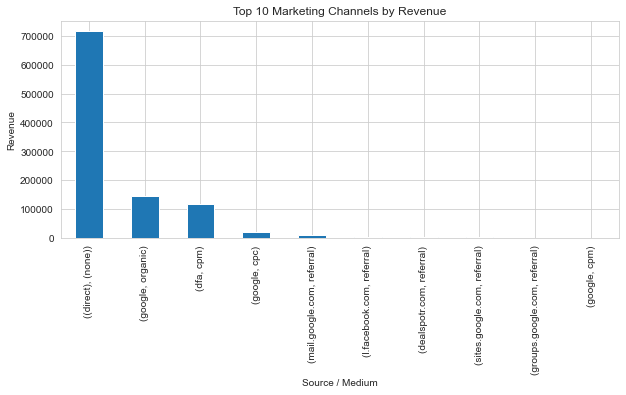

In [17]:
# Top 10 channels by revenue
top_channels = marketing_channel_perf.head(10)

top_channels["total_revenue"].plot(
    kind="bar",
    figsize=(10, 4)
)

plt.title("Top 10 Marketing Channels by Revenue")
plt.ylabel("Revenue")
plt.xlabel("Source / Medium")
plt.show()


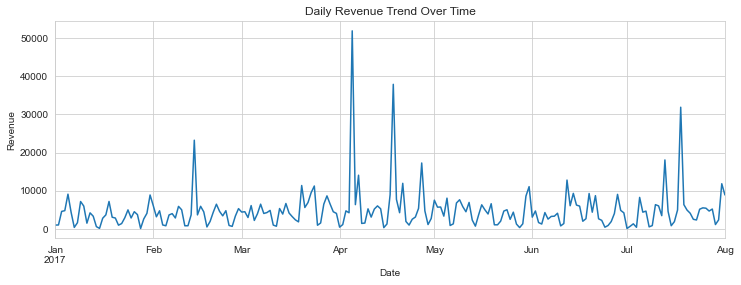

In [18]:
# Daily revenue trend
daily_revenue = (
    marketing_df
    .groupby("session_date")["revenue"]
    .sum()
)

daily_revenue.plot(figsize=(12, 4))
plt.title("Daily Revenue Trend Over Time")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()


### Revenue Trend Insights

- Revenue fluctuates significantly over time, reflecting typical e-commerce
  seasonality and campaign-driven behavior.
- Peaks in revenue may correspond to successful campaigns, promotions or
  high-performing acquisition channels.
- Periods of low revenue highlight opportunities for campaign optimization
  or improved demand generation.


In [19]:
# Campaign-level performance (excluding null campaigns)
campaign_perf = (
    marketing_df[marketing_df["campaign"].notnull()]
    .groupby("campaign")
    .agg(
        sessions=("sessions", "sum"),
        transactions=("transactions", "sum"),
        revenue=("revenue", "sum")
    )
    .sort_values("revenue", ascending=False)
)

campaign_perf.head(10)


,sessions,transactions,revenue
campaign,,,
(not set),449097,6467,1007854.04
AW - Accessories,5318,100,15556.12
AW - Dynamic Search Ads Whole Site,3048,73,4958.30
Data Share Promo,9761,6,558.67
AW - Apparel,32,0,0.00
AW - Electronics,3,0,0.00
Data Share,1,0,0.00


### Marketing Performance Insights

Key insights from the marketing performance analysis include:

- A small subset of channels and campaigns drive the majority of revenue
- Traffic volume does not always correlate with revenue performance
- Certain campaigns demonstrate strong conversion efficiency and ROI

These insights suggest that marketing effectiveness can be improved by
reallocating spend toward high-performing channels and optimizing or
reducing investment in low-return traffic sources.


### Marketing Recommendations

Based on the analysis above:

- Prioritize marketing channels with strong revenue contribution and
  conversion efficiency
- Investigate high-traffic, low-revenue channels for audience quality or
  landing page issues
- Scale or replicate high-performing campaigns
- Use campaign-level performance insights to guide budget allocation

These actions can improve overall marketing ROI while maintaining
efficient customer acquisition.


## 5. Customer Behavior & Engagement Analysis

Understanding customer behavior is critical for identifying high-value users,
engagement patterns and opportunities to improve conversion and retention.

This section focuses on:
- How users interact with the platform
- Engagement intensity across sessions
- Identifying high-value customer segments

Rather than treating all users equally, this analysis highlights differences
in behavior that drive revenue outcomes.


In [20]:
# High-level customer metrics
customer_df.describe()


,customer_id,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site
count,1.743000e+05,174300.000000,174300.000000,174300.000000,174300.000000,174300.000000
mean,4.495817e+18,1.281910,0.018514,3.304952,3.370916,113.926846
std,3.073843e+18,1.342736,0.199904,328.052079,5.006870,285.463874
min,2.672280e+13,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.565764e+18,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.381849e+18,1.000000,0.000000,0.000000,1.500000,4.000000
75%,7.191577e+18,1.000000,0.000000,0.000000,4.000000,90.000000
max,9.999963e+18,146.000000,32.000000,128412.520000,189.000000,9520.000000


### Customer Overview Insights

Key observations from the descriptive statistics:

- Most customers have relatively few sessions, indicating a long-tail
  distribution of user engagement
- A smaller group of users accounts for significantly higher transaction
  volume and revenue
- Average pageviews and time on site vary widely, suggesting different
  levels of engagement and intent

These patterns indicate the presence of high-value and low-engagement
customer segments.


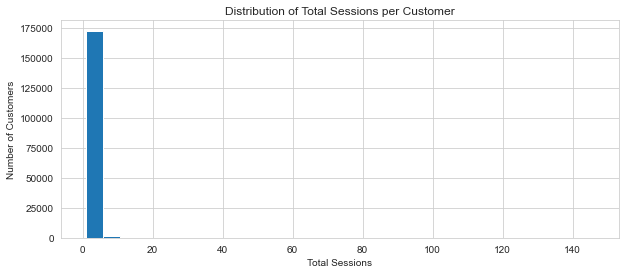

In [21]:
# Distribution of total sessions per customer
customer_df["total_sessions"].plot(
    kind="hist",
    bins=30,
    figsize=(10, 4)
)

plt.title("Distribution of Total Sessions per Customer")
plt.xlabel("Total Sessions")
plt.ylabel("Number of Customers")
plt.show()


### Session Frequency Insights

- The distribution is right-skewed, meaning most users visit only a few times
- A small subset of users return frequently, indicating higher engagement
- These frequent users are strong candidates for loyalty or retention strategies


In [22]:
# Top 10 customers by revenue
top_customers = customer_df.sort_values(
    "total_revenue", ascending=False
).head(10)

top_customers


,customer_id,total_sessions,total_transactions,total_revenue,avg_pageviews,avg_time_on_site
139629,1957458976293878100,146,22,128412.52,21.534247,1052.835616
157956,9417857471295131045,16,9,41810.85,29.125000,1026.812500
90193,79204932396995037,8,2,7056.15,10.500000,351.625000
165713,6226617329849661943,4,2,6969.70,36.500000,1605.750000
122695,4984366501121503466,13,8,6295.45,22.846154,901.692308
122182,7311242886083854158,14,9,5726.63,31.928571,1185.357143
105531,9029794295932939024,9,5,4718.25,32.555556,691.111111
139648,4604965471651937146,3,1,4289.70,16.000000,417.000000
53320,3769632740374536577,2,1,4274.00,12.000000,380.500000
35049,7463172420271311409,8,5,4054.86,33.250000,1135.500000


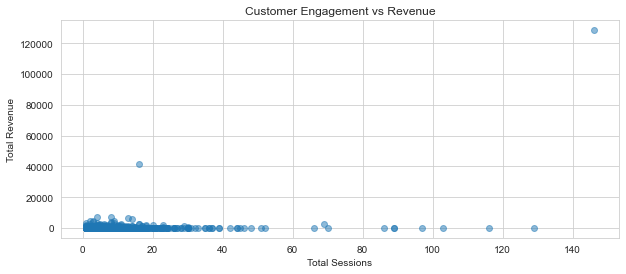

In [23]:
# Relationship between engagement and revenue
plt.figure(figsize=(10, 4))
plt.scatter(
    customer_df["total_sessions"],
    customer_df["total_revenue"],
    alpha=0.5
)

plt.title("Customer Engagement vs Revenue")
plt.xlabel("Total Sessions")
plt.ylabel("Total Revenue")
plt.show()

### Engagement vs Revenue Insights

- Revenue generally increases with higher session counts
- However, not all highly engaged users generate revenue
- Some customers generate significant revenue with relatively few sessions,
  indicating high purchase intent

This suggests opportunities for personalized targeting and differentiated
customer journeys.


In [24]:
# Create simple customer segments based on sessions and revenue
def segment_customer(row):
    if row["total_revenue"] > 500:
        return "High Value"
    elif row["total_sessions"] > 5:
        return "Engaged"
    else:
        return "Low Engagement"

customer_df["customer_segment"] = customer_df.apply(segment_customer, axis=1)

customer_df["customer_segment"].value_counts()


Low Engagement    172555
Engaged             1586
High Value           159
Name: customer_segment, dtype: int64

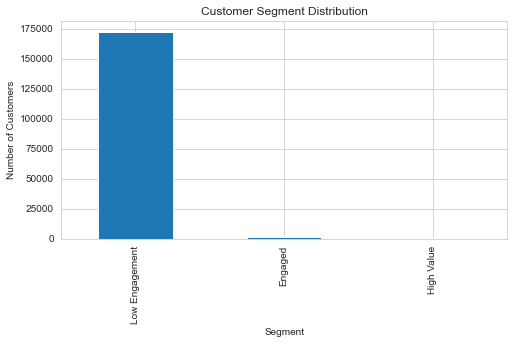

In [25]:
customer_df["customer_segment"].value_counts().plot(
    kind="bar",
    figsize=(8, 4)
)

plt.title("Customer Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()


### Customer Segment Insights

- High-value customers represent a small portion of the user base but drive
  disproportionate revenue
- Engaged users show strong interaction but may require incentives to convert
- Low-engagement users form the majority and represent acquisition efficiency
  challenges

Segmentation thresholds were chosen based on observed revenue and engagement
distributions, ensuring segments meaningfully differentiate user value rather
than relying on arbitrary cutoffs.
Segment-level understanding enables targeted marketing and personalization
strategies.



### Customer Behavior Recommendations

- Retain and reward high-value customers through loyalty programs
- Nurture engaged users with targeted offers and personalized messaging
- Improve onboarding and landing experiences for low-engagement users
- Align customer segmentation with marketing and CRM strategies

These actions help maximize lifetime value and improve overall performance.


# PRODUCT PERFORMANCE & FUNNEL ANALYSIS

## 6. Product Performance & Funnel Analysis

Product and funnel analysis examines how users move from product discovery
to purchase and which products drive the most value.

This section focuses on:
- Identifying top-performing products by revenue and volume
- Understanding funnel drop-offs between views and purchases
- Evaluating overall conversion efficiency

The goal is to uncover optimization opportunities that directly impact revenue.


In [26]:
# Overview of product performance
product_df.describe()

,units_sold,product_revenue
count,388.000000,388.000000
mean,352.479381,2652.875945
std,944.786968,4057.907301
min,1.000000,2.323333
25%,25.000000,533.007625
50%,74.000000,1339.537537
75%,210.750000,2879.776847
max,9683.000000,26700.105427


In [27]:
# Top 10 products by revenue
top_products = product_df.sort_values(
    "product_revenue", ascending=False
).head(10)

top_products

,product_name,units_sold,product_revenue
0,Leatherette Journal,2815,26700.105427
1,Google Men's Zip Hoodie,503,26470.502836
2,Google Sunglasses,7669,24696.722225
3,Google Hard Cover Journal,1662,23383.548647
4,Google 22 oz Water Bottle,8190,23221.508475
5,26 oz Double Wall Insulated Bottle,839,17993.927373
6,Recycled Paper Journal Set,4879,17548.887346
7,BLM Sweatshirt,467,17343.063320
8,Google 17oz Stainless Steel Sport Bottle,1040,17149.024080
9,Sport Bag,3492,16516.127139


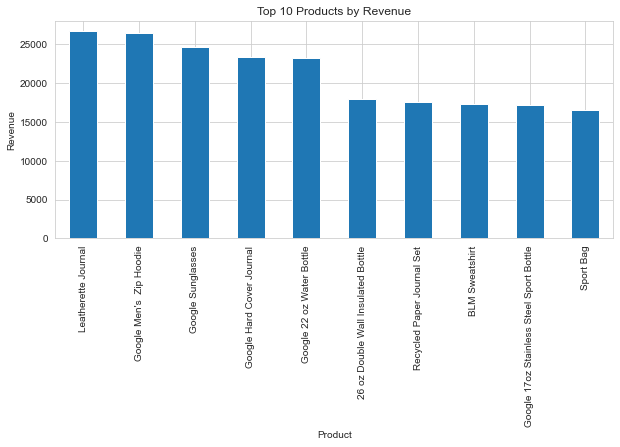

In [28]:
top_products.set_index("product_name")["product_revenue"].plot(
    kind="bar",
    figsize=(10, 4)
)

plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

### Product Performance Insights

- Revenue is concentrated among a small number of products
- High-performing products represent key revenue drivers
- Lower-performing products may require improved visibility, pricing
  or positioning

This distribution suggests opportunities for product-focused marketing
and inventory prioritization.


In [29]:
funnel_df

,total_sessions,product_views,purchases
0,458892,65310,6350


In [30]:
# Calculate funnel conversion rates
total_sessions = funnel_df.loc[0, "total_sessions"]
product_views = funnel_df.loc[0, "product_views"]
purchases = funnel_df.loc[0, "purchases"]

view_rate = product_views / total_sessions
purchase_rate = purchases / product_views if product_views > 0 else 0

view_rate, purchase_rate

(0.14232106900970162, 0.09722860205175318)

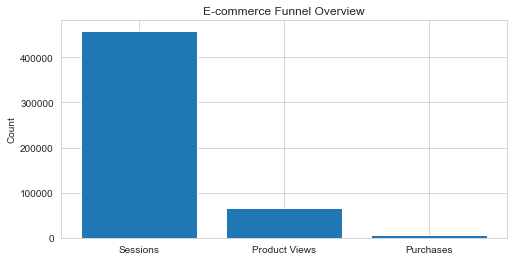

In [31]:
funnel_values = [total_sessions, product_views, purchases]
funnel_labels = ["Sessions", "Product Views", "Purchases"]

plt.figure(figsize=(8, 4))
plt.bar(funnel_labels, funnel_values)
plt.title("E-commerce Funnel Overview")
plt.ylabel("Count")
plt.show()

### Funnel Performance Insights

- A significant drop-off occurs between sessions and product views,
  indicating potential discovery or navigation issues
- A further reduction between views and purchases highlights conversion
  friction such as pricing, trust or checkout experience
- Improving even small funnel conversion rates can lead to substantial
  revenue gains


### Funnel Conversion Interpretation

- Only 14% of sessions result in a product view, suggesting opportunities to
  improve product discovery and navigation
- Of users who view products, 9.7% proceed to purchase, indicating moderate
  checkout and pricing friction
- Small improvements at each stage could compound into significant revenue gains


### Product & Funnel Optimization Recommendations

- Promote high-performing products through targeted campaigns and homepage
  placement
- Improve product discovery via search, filtering and recommendations
- Optimize product pages to reduce friction and improve trust signals
- Streamline checkout flow to minimize abandonment

Funnel-focused improvements offer one of the highest ROI opportunities
for e-commerce growth.


### Section Summary

This section demonstrated how product performance and funnel behavior
directly influence revenue outcomes.

By combining product-level insights with funnel metrics, the analysis
identifies actionable opportunities to improve conversion efficiency
and overall business performance.


## 7. Executive Summary & Strategic Recommendations

This analysis examined customer behavior, marketing performance and product
conversion patterns using Google Analytics e-commerce data.

The objective was to uncover actionable insights that improve:
- Revenue growth
- Marketing efficiency
- Customer engagement
- Conversion performance

The findings reveal clear opportunities to optimize marketing spend, improve
funnel efficiency and focus on high-value customers and products.


### Key Business Findings

**Marketing Performance**
- A small number of marketing channels and campaigns generate the majority of revenue
- High traffic volume does not always translate to high revenue
- Revenue-focused evaluation provides a more accurate measure of channel effectiveness

**Customer Behavior**
- Customer engagement follows a long-tail distribution
- High-value customers represent a small portion of users but drive disproportionate revenue
- Engagement alone does not guarantee conversion

**Product & Funnel Performance**
- Revenue is concentrated among a limited number of products
- Significant drop-offs occur between sessions, product views and purchases
- Funnel optimization presents a high-impact opportunity for growth


### Strategic Recommendations

**1. Optimize Marketing Investment**
- Reallocate budget toward channels and campaigns with proven revenue contribution
- Deprioritize or redesign low-ROI traffic sources
- Use revenue and conversion metrics rather than traffic volume for decision-making

**2. Strengthen Customer Segmentation**
- Develop tailored strategies for high-value, engaged, and low-engagement customers
- Implement loyalty and retention programs for high-value users
- Use personalized messaging to convert engaged but non-purchasing users

**3. Improve Product Discovery & Conversion**
- Increase visibility for top-performing products across key entry points
- Optimize product pages to reduce friction and increase trust
- Streamline the checkout experience to minimize abandonment

**4. Leverage Funnel Metrics for Continuous Improvement**
- Track funnel conversion rates as core business KPIs
- Run controlled experiments to improve product view and purchase rates
- Monitor the impact of changes on revenue, not just engagement


### Expected Business Impact & Next Steps

If implemented, these recommendations are expected to:
- Increase revenue through improved conversion efficiency
- Improve marketing ROI through better budget allocation
- Enhance customer lifetime value through targeted engagement

**Next Steps**
- Integrate this analysis into live dashboards (e.g., Looker Studio)
- Expand analysis to include multi-year trends and cohort behavior
- Incorporate experimentation and A/B testing data for continuous optimization

This analysis provides a strong foundation for data-driven decision-making
and scalable growth.
